# Evaluation and Recommendations

## Topics Evaluation

### Summary Results
**LDA Results**
The 4-topic LDA model uncovered nuanced themes around events/webinars, seeking solutions, research updates, and business innovation. Each topic contains interpretible keywords that summarize its focus:

* Topic 0: webinar, event, time, march (Events & Webinars)
* Topic 1: challenge, seek, solution, submit (Requests for Solutions)
* Topic 2: technology, new, researcher, information, science, research (Research Updates)
* Topic 3: industry, research, business, idea (Business & Industry Innovation)

**K-means Results**
K-means clustering identified two  themes:

* Cluster 0 : innovation, open, webinar, technology, new, research, look, challenge (Innovation Exploration)
* Cluster 1 : challenge, new, technology, research, seek, solution,  submit  (Challenges and Solutions)

### Comparison
Both LDA and K-means successfully identified common themes related to "Innovation," "Technology," and "Research." This similarity underscores the dataset's primary focus on technological advancements, challenges, and research opportunities, which aligns well with the nature of companies operating in the technology and innovation sectors.

While LDA found 4 more fine-grained topics, K-means resulted in 2 broad clusters. LDA Topic 1 - "Requests for Solutions" on seeking solutions closely matches K-means Cluster 1 - "Challenges and Solutions". And LDA Topic 3 - "Business Innovation" aligns with aspects of K-means Cluster 0 - "Innovation Exploration" . This suggests the two major themes found by K-means underlie several of the LDA topics.

However, LDA separates events, research updates, and industry innovation into distinct topics. K-means consolidated these themes into its broader clusters. Overall, LDA discovers more nuanced semantic topics, while K-means provides higher-level partitioning of the corpus.

### Application
Our goal is to help ResearchPreneurs start developing an initial Twitter strategy. The 2 main clusters from K-means - Innovation Exploration and Challenges & Solutions - provide an effective way to understand competitors' high-level messaging. These groups summarize the broader conversations in a simple overview.

For launching their own account, ResearchPreneurs could consider focusing on one or both macro-topics based on their goals. The K-means clusters analyze competitors' content in an easy-to-understand way. Later, the more granular 4 topics from LDA can help refine messaging and find specific events, research, etc. to tweet about within those big categories. But for initial strategy, the generalized K-means clusters give ResearchPreneurs useful perspective on competitors' main Twitter themes to inform their approach.

## Tweet Clusters and Engagement Rates

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt 

# ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_pickle("pickle_files/topic_dataset.pkl")

In [3]:
df.head(5)

,user_id,user_name,date,text,tweet_id,is_reply,replies,retweets,quotes,cleaned_text,cluster_number,cluster_name,topic_number,topic_name
0,72579390,innoget,Fri Feb 26 11:35:21 +0000 2016,#Global #Biotech Reagents Market 2016 Industry...,703181551727570944,False,0,0,0,global biotech reagent market industry share r...,1,Challenges and Solutions,3,Business & Industry Innovation
1,72579390,innoget,Thu Feb 25 10:15:16 +0000 2016,Tech Transfer Office in #Ohio #University help...,702799011187658752,False,0,0,0,tech transfer office ohio university help staf...,0,Innovation Exploration,3,Business & Industry Innovation
2,72579390,innoget,Wed Feb 24 12:10:05 +0000 2016,What’s your point regarding IP protection? Doe...,702465520109559808,False,0,0,0,point regard protection benefit market new pro...,1,Challenges and Solutions,2,Research Updates
3,72579390,innoget,Tue Feb 23 15:15:17 +0000 2016,New article about #Samsung and its investment ...,702149739492597761,False,0,0,0,new samsung investment biotechnology aim becom...,1,Challenges and Solutions,3,Business & Industry Innovation
4,72579390,innoget,Mon Feb 22 12:01:04 +0000 2016,Want to success in Tech Transfer? Visit our bl...,701738474878144513,False,0,0,0,want success tech transfer visit new ten step ...,1,Challenges and Solutions,3,Business & Industry Innovation


## Topics/ Clusters Distribution

First, we plot the number of tweets in each topic and cluster to gain insights into the distribution of tweets across different topics. By understanding the relative tweet volumes in each topic, we can identify popular subjects and potential trends within the data.

### Clusters

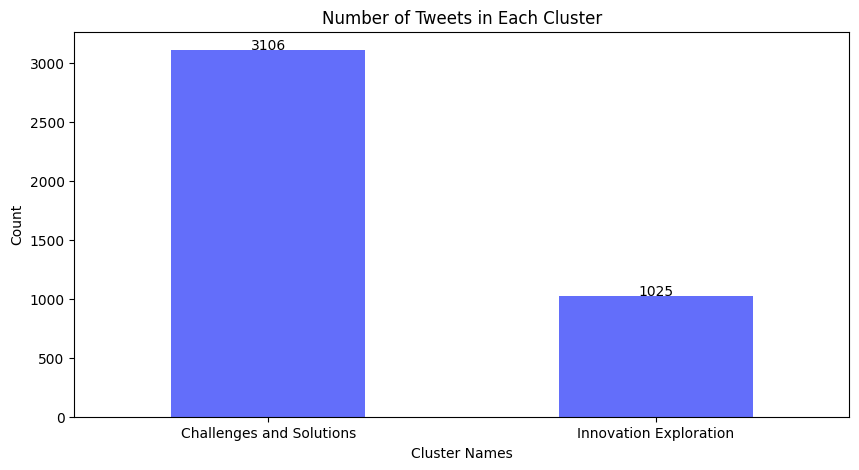

In [6]:
plt.figure(figsize=(10, 5))

topic_counts = df['cluster_name'].value_counts()
topic_counts.plot(kind='bar', color='#636efa')  
plt.title('Number of Tweets in Each Cluster')
plt.xlabel('Cluster Names')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add data labels on top of each bar
for i, count in enumerate(topic_counts):
    plt.text(i, count + 5, count, ha='center')

plt.show()

The tweet distribution shows the Challenges and Solutions theme was much more dominant, with about 3x as many tweets as Innovation Exploration. The "Challenges and Solutions" cluster has 3106 tweets, while the "Innovation Exploration" cluster had 1025 tweets.

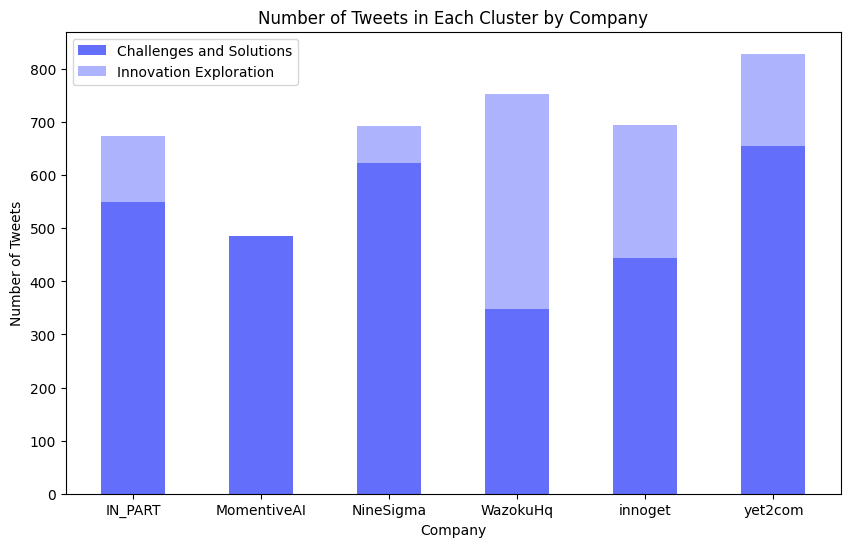

In [13]:
# number of tweets in each cluster by company
# group the data by user_name and cluster_name, and count the number of tweets in each group
grouped_data = df.groupby(['user_name', 'cluster_name']).size().unstack()

# get the list of user_names and cluster names
user_names = grouped_data.index
cluster_names = grouped_data.columns

# plot the chart
bar_width = 0.5
fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(user_names))
colors = ['#636efa', '#adb3fc'] 

for i, cluster in enumerate(cluster_names):
    ax.bar(user_names, grouped_data[cluster], bottom=bottom, width=bar_width, label=cluster, color=colors[i])
    bottom += grouped_data[cluster]

# add labels, legend, and title
ax.set_xlabel('Company')
ax.set_ylabel('Number of Tweets')
ax.set_title('Number of Tweets in Each Cluster by Company')
ax.legend()

plt.xticks(rotation=0)
plt.show()


In [11]:
# group the data by user_name and topic_name, and count the number of tweets in each group
grouped_data = df.groupby(['user_name', 'cluster_name']).size().unstack()

# calculate the total number of tweets for each company
total_tweets = grouped_data.sum(axis=1)

# calculate the percentage of each topic relative to the total number of tweets for each company
percentages = (grouped_data.div(total_tweets, axis=0) * 100).round(2)

# store all numbers in a df
result_df = pd.concat([grouped_data, percentages], axis=1, keys=['Count', 'Percentage'])
result_df

Count                         \
cluster_name Challenges and Solutions Innovation Exploration   
user_name                                                      
IN_PART                           550                    124   
MomentiveAI                       485                      1   
NineSigma                         624                     69   
WazokuHq                          348                    406   
innoget                           444                    251   
yet2com                           655                    174   

                           Percentage                         
cluster_name Challenges and Solutions Innovation Exploration  
user_name                                                     
IN_PART                         81.60                  18.40  
MomentiveAI                     99.79                   0.21  
NineSigma                       90.04                   9.96  
WazokuHq                        46.15                  53.85  
innoget                         63.88                  36.12  
yet2com                         79.01                  20.99

From the results, we can draw the following conclusions:

The "Challenges and Solutions" cluster accounts for 81.60% of the tweets, while "Innovation Exploration" accounts for 18.40%.
* "IN_PART" contributed the most tweets overall, with 55% in "Challenges and Solutions" and 45% in "Innovation Exploration". Their tweets are relatively balanced between the clusters.
* "MomentiveAI", "NineSigma", and "yet2com" have heavy concentration (90%+) in the "Challenges and Solutions" cluster, with very few "Innovation Exploration" tweets. Their content focuses heavily on challenges and solutions.
* "WazokuHq" conversely has a higher portion of their tweets (53.85%) in the "Innovation Exploration" cluster. Their content appears more innovation focused.
* "innoget" falls in the middle with a slight skew (63.88%) towards "Challenges and Solutions".


### LDA Topics

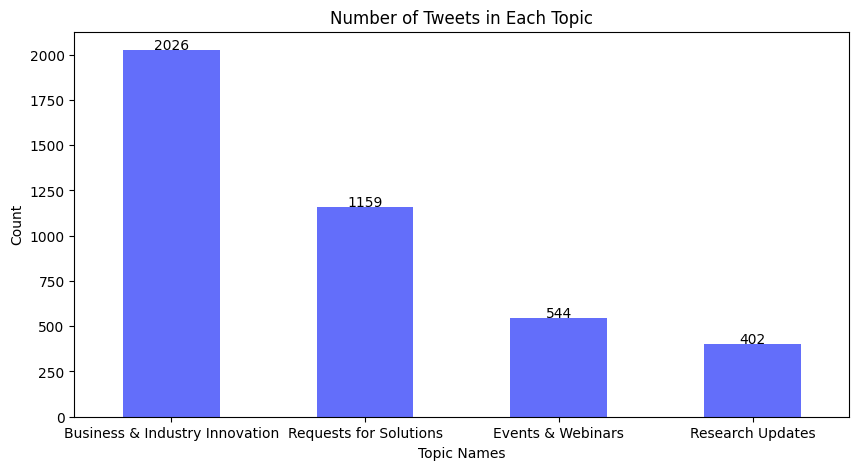

In [14]:
plt.figure(figsize=(10, 5))

topic_counts = df['topic_name'].value_counts()
topic_counts.plot(kind='bar', color='#636efa')  
plt.title('Number of Tweets in Each Topic')
plt.xlabel('Topic Names')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add data labels on top of each bar
for i, count in enumerate(topic_counts):
    plt.text(i, count + 5, count, ha='center')

plt.show()

Overall, The Business & Industry Innovation topic contains the most tweets at 2026. This indicates that discussions around business innovations and new developments were the most common theme. The Requests for Solutions topic had 1159 tweets, making it the second most common topic. There were a substantial number of tweets focused on soliciting ideas/solutions for challenges.The Events & Webinars and Research Updates topics had fewer tweets at 544 and 402 respectively. While still significant conversations, upcoming events and research updates were less prevalent than business/solution discussions.

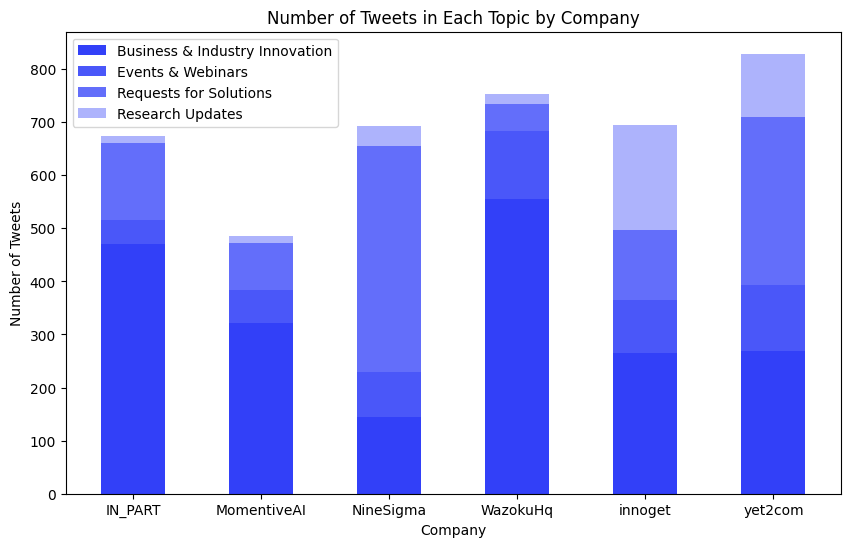

In [17]:
# number of tweets in each cluster by company
# group the data by user_name and cluster_name, and count the number of tweets in each group
grouped_data = df.groupby(['user_name', 'topic_name']).size().unstack()

# get the list of user_names and cluster names
user_names = grouped_data.index
cluster_names = grouped_data.columns

# plot the chart
bar_width = 0.5
fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(user_names))
colors = ['#3240f8','#4a57f9','#636efa', '#adb3fc' ]  # Specify colors for each cluster

for i, cluster in enumerate(cluster_names):
    ax.bar(user_names, grouped_data[cluster], bottom=bottom, width=bar_width, label=cluster, color=colors[i])
    bottom += grouped_data[cluster]

# add labels, legend, and title
ax.set_xlabel('Company')
ax.set_ylabel('Number of Tweets')
ax.set_title('Number of Tweets in Each Topic by Company')
ax.legend()

plt.xticks(rotation=0)
plt.show()


In [18]:
# group the data by user_name and topic_name, and count the number of tweets in each group
grouped_data = df.groupby(['user_name', 'topic_name']).size().unstack()

# calculate the total number of tweets for each company
total_tweets = grouped_data.sum(axis=1)

# calculate the percentage of each topic relative to the total number of tweets for each company
percentages = (grouped_data.div(total_tweets, axis=0) * 100).round(2)

# store all numbers in a df
result_df = pd.concat([grouped_data, percentages], axis=1, keys=['Count', 'Percentage'])
result_df

Count                    \
topic_name  Business & Industry Innovation Events & Webinars   
user_name                                                      
IN_PART                                470                45   
MomentiveAI                            321                62   
NineSigma                              145                85   
WazokuHq                               555               128   
innoget                                266                99   
yet2com                                269               125   

                                                     \
topic_name  Requests for Solutions Research Updates   
user_name                                             
IN_PART                        146               13   
MomentiveAI                     89               14   
NineSigma                      426               37   
WazokuHq                        52               19   
innoget                        131              199   
yet2com                        315              120   

                                Percentage                    \
topic_name  Business & Industry Innovation Events & Webinars   
user_name                                                      
IN_PART                              69.73              6.68   
MomentiveAI                          66.05             12.76   
NineSigma                            20.92             12.27   
WazokuHq                             73.61             16.98   
innoget                              38.27             14.24   
yet2com                              32.45             15.08   

                                                     
topic_name  Requests for Solutions Research Updates  
user_name                                            
IN_PART                      21.66             1.93  
MomentiveAI                  18.31             2.88  
NineSigma                    61.47             5.34  
WazokuHq                      6.90             2.52  
innoget                      18.85            28.63  
yet2com                      38.00            14.48

* The "Business & Industry Innovation" topic has the most tweets overall at 32.45%, followed by "Requests for Solutions" at 38.00%.
* Company "IN_PART" has the most balanced distribution across topics. "NineSigma" is heavily concentrated in "Requests for Solutions" with 61.47% of tweets.
* "MomentiveAI" and "WazokuHq" have their largest portions in "Business & Industry Innovation" with 66.05% and 73.61% respectively.
* "innoget" has their highest percentage in "Research Updates" at 28.63%, making them stand out.
* "yet2com" has 38% in "Requests for Solutions" and 32.45% in "Business Innovation", aligning with the overall distribution.

In summary, while distributions vary, "Business Innovation" and "Requests for Solutions" dominate for most companies. But some like "innoget" diverge with more "Research Updates" content. Comparing per-topic tweet counts reveals differences in content focus between the companies.

### Engagement Analysis

Since we have decided to focus on using the two topics derived from the K-means clustering analysis, the following engagement analysis will be centered around these specific topics. Examining engagement metrics for the Innovation Exploration and Challenges & Solutions topics will reveal which resonates better with the target audience. This will help ResearchPreneurs make data-driven decisions about content strategy and messaging to maximize engagement. In the following sections, we will analyze key metrics like likes, retweets, replies, and reach for each cluster. By evaluating audience interaction data for the two key topics, ResearchPreneurs can gain insights to refine content that drives engagement.

From DataFrame, we can quickly observe that a large number of tweets have not been retweeted, replied to, or quoted. Let's calculate the percentage of tweets that have a non-zero value for these metrics.

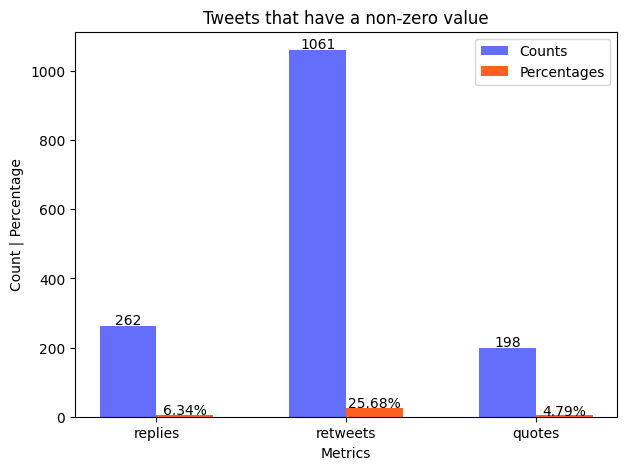

In [7]:
# calculate the number of tweets & percentage that have a non-zero value for each metrics
total_tweets = len(df)

metrics = ['replies', 'retweets', 'quotes']
counts = [(df[metric] != 0).sum() for metric in metrics]
percentages = [(count / total_tweets) * 100 for count in counts]

# plot the barchart
width = 0.3
fig, ax = plt.subplots(figsize=(7, 5))
x = np.arange(len(metrics))

ax.bar(x - width/2, counts, width, label='Counts', color='#636efa')
ax.bar(x + width/2, percentages, width, label='Percentages', color='#FF5F1F')

# add the labels and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Count | Percentage')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_title("Tweets that have a non-zero value")
ax.legend()

# add data labels 
for i in range(len(metrics)):
    ax.text(x[i] - width/2, counts[i]+5, counts[i], ha='center')
    ax.text(x[i] + width/2, percentages[i]+0.5, f"{percentages[i]:.2f}%", ha='center')

plt.show()

Based on the chart, we can draw the following interpretation:
* The majority of tweets in the dataset have not received replies, with only 6.34% of tweets having replies. This suggests that the engagement level in terms of direct responses to tweets is relatively low.

* Retweets are more prevalent compared to replies and quotes, with 25.68% of tweets being retweeted. This indicates that a significant number of tweets have resonated with users and have been shared with a wider audience.

* Quotes are the least common interaction, with only 4.79% of tweets being quoted. This suggests that users are less inclined to quote tweets in their own posts compared to retweeting or replying.

In short, the general engagement rate is low. Next, we will analyze these numbers of each company.

In [8]:
metrics = ['replies', 'retweets', 'quotes']
user_names = df['user_name'].unique()

results = pd.DataFrame({'Company': user_names})

for metric in metrics:
    counts = []
    percentages = []
    for user_name in user_names:
        user_data = df[df['user_name'] == user_name]
        count = (user_data[metric] != 0).sum()
        percentage = (count / len(user_data)) * 100
        counts.append(count)
        percentages.append(percentage)
    results[f'{metric}_count'] = counts
    results[f'{metric}_percentage'] = percentages
print("Tweets that have non-zero values")
results

Tweets that have non-zero values


,Company,replies_count,replies_percentage,retweets_count,retweets_percentage,quotes_count,quotes_percentage
0,innoget,15,2.158273,139,20.000000,4,0.575540
1,IN_PART,33,4.896142,144,21.364985,41,6.083086
2,NineSigma,18,2.597403,276,39.826840,42,6.060606
3,WazokuHq,31,4.111406,176,23.342175,19,2.519894
4,MomentiveAI,150,30.864198,248,51.028807,82,16.872428
5,yet2com,15,1.809409,78,9.408926,10,1.206273


Overall, MomentiveAI has the highest overall engagement rate, followed by WazokuHq and NineSigma. IN_PART has the highest reply rate, but its retweet and quote rates are lower than the average. innoget has the lowest overall engagement rate.

Next, we will examine the count and percentage of tweets with replies and retweets within each topic in order to gain insights into the level of interaction and audience engagement associated with different topics. 

In [39]:
# calculate the number of tweets with replies in each topic
replies_count_by_topic = df[df['replies'] != 0].groupby('cluster_name').size()

# calculate the number of tweets with retweets in each topic
retweets_count_by_topic = df[df['retweets'] != 0].groupby('cluster_name').size()

# calculate the total number of tweets per topic
total_tweets_by_topic = df.groupby('cluster_name').size()

# calculate the percentage of tweets with replies in each topic
replies_percentage_by_topic = (replies_count_by_topic / total_tweets_by_topic * 100).round(2)

# calculate the percentage of tweets with retweets in each topic
retweets_percentage_by_topic = (retweets_count_by_topic / total_tweets_by_topic * 100).round(2)

# create a single DataFrame to store the results
tweet_engagement_df = pd.DataFrame({
    'Replies Count': replies_count_by_topic,
    'Replies %': replies_percentage_by_topic,
    'Retweets Count': retweets_count_by_topic,
    'Retweets %': retweets_percentage_by_topic
})

tweet_engagement_df

,Replies Count,Replies %,Retweets Count,Retweets %
cluster_name,,,,
Challenges and Solutions,234,7.53,818,26.34
Innovation Exploration,28,2.73,243,23.71


The "Challenges and Solutions" topic generates more engagement in terms of both replies and retweets, suggesting active discussions and sharing of content. On the other hand, the "Innovation Exploration" topic exhibits lower levels of direct interaction through replies but still garners considerable engagement through retweets.

## Recommendations

Based on the analysis of competitors and their engagement with different topics, we would recommend the following approach for a company starting to write tweets on Twitter:

1. "Challenges and Solutions" Topic:

* Address relevant industry challenges and provide practical solutions in tweets
* Encourage engagement by asking questions and responding to replies
* Share success stories and real-world examples of overcoming challenges

2.  "Innovation Exploration" Topic
* Highlight innovative ideas, emerging trends, and new technologies
* Share thought-provoking research findings and future outlooks
* Showcase your innovative initiatives and projects

## Limitations

There are two main limitations of this project:
* **Limited data**: The final dataset is around 4k tweets, which is quite small to draw conclusions about engagement.
* **Not diverse subject**: The subject is not diverse in nature, which makes it difficult to come up with topics that are significantly different.


One suggestion to address the limited data is to increase the size of the dataset. This could be done by looking at tweets from a wider range of companies or industries. This would allow us to have better topic modeling, which would help us to identify the most engaging topics. It would also allow us to draw more accurate conclusions about engagement.